In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Stocks/Financial Statements/Financial Statements.csv')
df2 = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Stocks/Stock Prices/all_stocks_5yr.csv')

In [ ]:
df1.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [ ]:
df1['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2023])

In [ ]:
df1.dtypes

Year                                     int64
Company                                 object
Category                                object
Market Cap(in B USD)                   float64
Revenue                                float64
Gross Profit                           float64
Net Income                             float64
Earning Per Share                      float64
EBITDA                                 float64
Share Holder Equity                    float64
Cash Flow from Operating               float64
Cash Flow from Investing               float64
Cash Flow from Financial Activities    float64
Current Ratio                          float64
Debt/Equity Ratio                      float64
ROE                                    float64
ROA                                    float64
ROI                                    float64
Net Profit Margin                      float64
Free Cash Flow per Share               float64
Return on Tangible Equity              float64
Number of Emp

In [ ]:
df2.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df2['date'] = pd.to_datetime(df2['date'])

In [ ]:
df2['Year'] = df2['date'].dt.year

Find annual percent change rather than numerical to weigh each company the same

In [ ]:
def annual_change(group):
    initial_open = group.iloc[0]['open']
    final_close = group.iloc[-1]['close']
    return (final_close - initial_open) / initial_open * 100

In [ ]:
df3 = df2.groupby(['Name', 'Year']).apply(annual_change).reset_index()
df3.columns = ['Company', 'Year', 'Annual Percent Change']

In [ ]:
df3.head()

,Company,Year,Annual Percent Change
0,A,2013,26.891502
1,A,2014,-28.301226
2,A,2015,1.529869
3,A,2016,10.959571
4,A,2017,45.808840


In [ ]:
df3.dtypes

Company                   object
Year                       int64
Annual Percent Change    float64
dtype: object

In [ ]:
df1 = df1.rename(columns={'Company ':'Company'})

Merge the two datasets by company and year to find correlations between financial statements and the change in stock price

In [ ]:
df4 = df3.merge(df1, on=['Company','Year'])

In [ ]:
df4.head()

,Company,Year,Annual Percent Change,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,AAPL,2013,18.358631,IT,504.79,170910.0,64304.0,37037.0,1.4200,55756.0,...,1.6786,0.1373,29.9776,17.8923,26.3592,21.6705,0.1363,31.4425,84400,1.4648
1,AAPL,2014,39.047753,IT,647.36,182795.0,70537.0,39510.0,1.6125,60449.0,...,1.0801,0.3164,35.4201,17.0420,28.1142,21.6144,0.3032,38.4380,97000,1.6222
2,AAPL,2015,-5.503187,IT,586.86,233715.0,93626.0,53394.0,2.3050,82487.0,...,1.1088,0.5390,44.7355,18.3899,30.9201,22.8458,0.9743,48.3878,110000,0.1186
3,AAPL,2016,12.873989,IT,617.59,215639.0,84263.0,45687.0,2.0775,70529.0,...,1.3527,0.6786,35.6237,14.2024,22.4312,21.1868,-0.5901,38.1906,116000,1.2616
4,AAPL,2017,46.139896,IT,868.87,229234.0,88186.0,48351.0,2.3025,71501.0,...,1.2761,0.8630,36.0702,12.8826,20.9082,21.0924,0.0330,36.0702,123000,2.1301


In [ ]:
df4['Category'].unique()

array(['IT', 'Bank', 'LOGI', 'ELEC', 'FOOD', 'Manufacturing', 'FinTech'],
      dtype=object)

In [ ]:
df4.columns

Index(['Company', 'Year', 'Annual Percent Change', 'Category',
       'Market Cap(in B USD)', 'Revenue', 'Gross Profit', 'Net Income',
       'Earning Per Share', 'EBITDA', 'Share Holder Equity',
       'Cash Flow from Operating', 'Cash Flow from Investing',
       'Cash Flow from Financial Activities', 'Current Ratio',
       'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin',
       'Free Cash Flow per Share', 'Return on Tangible Equity',
       'Number of Employees', 'Inflation Rate(in US)'],
      dtype='object')

Make visualizations for numerical columns to find correlations

In [ ]:
num_cols = ['Market Cap(in B USD)', 'Revenue', 'Gross Profit', 'Net Income',
       'Earning Per Share', 'EBITDA', 'Share Holder Equity',
       'Cash Flow from Operating', 'Cash Flow from Investing',
       'Cash Flow from Financial Activities', 'Current Ratio',
       'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin',
       'Free Cash Flow per Share', 'Return on Tangible Equity',
       'Number of Employees', 'Inflation Rate(in US)']

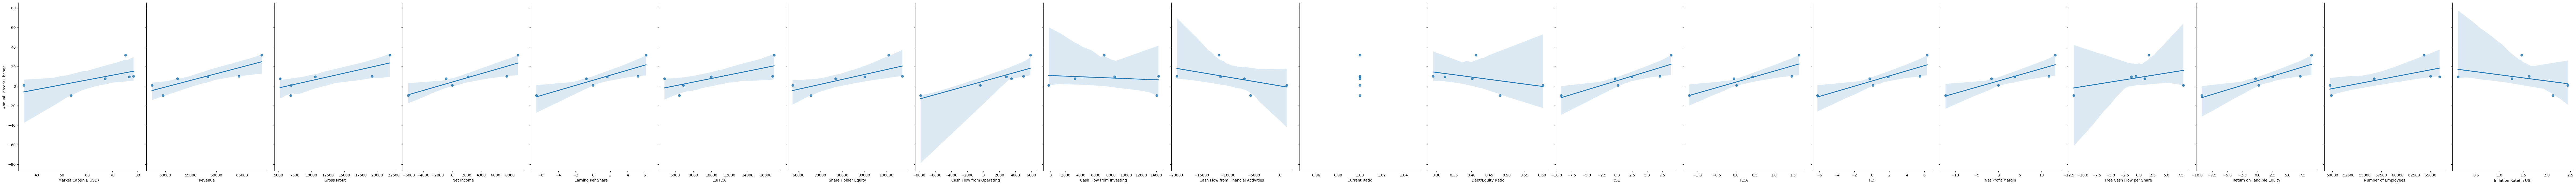

In [ ]:
import seaborn as sns

sns.pairplot(df4.loc[df4['Category']=='Bank'], x_vars=num_cols, y_vars='Annual Percent Change', height = 7, aspect = 0.7, kind='reg')

Look at correlations in other industries

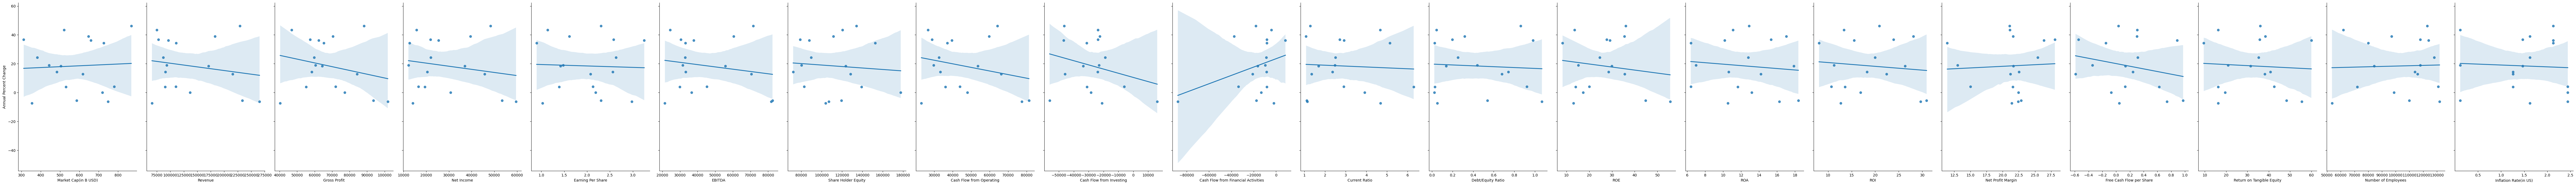

In [ ]:
sns.pairplot(df4.loc[df4['Category']=='IT'], x_vars=num_cols, y_vars='Annual Percent Change', height = 7, aspect = 0.7, kind='reg')

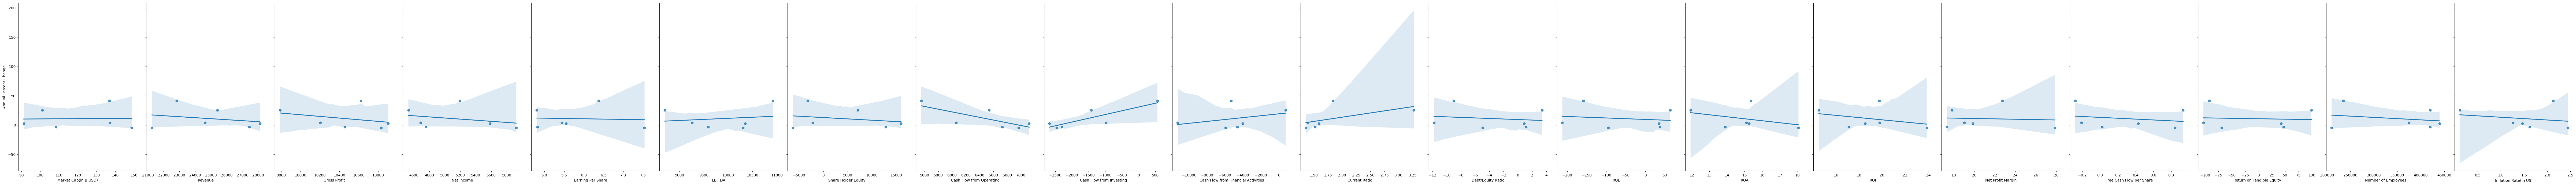

In [ ]:
sns.pairplot(df4.loc[df4['Category']=='FOOD'], x_vars=num_cols, y_vars='Annual Percent Change', height = 7, aspect = 0.7, kind='reg')

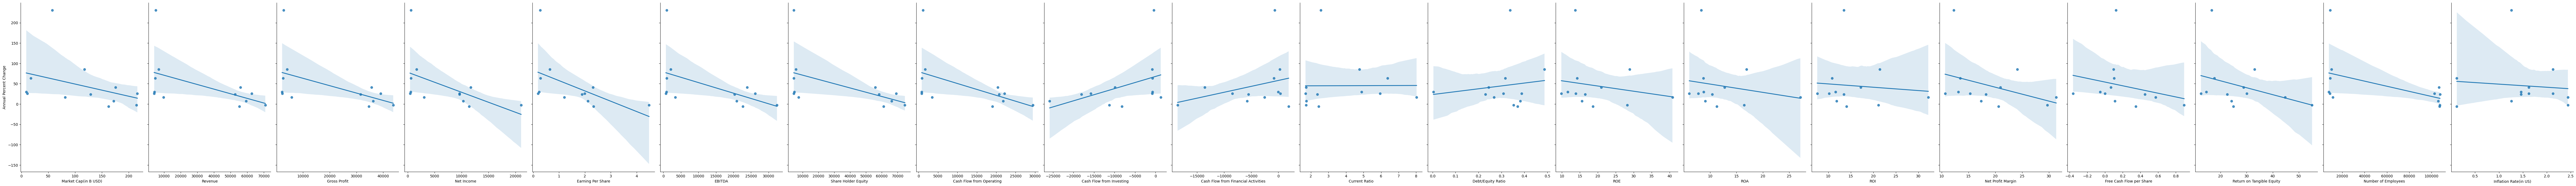

In [ ]:
sns.pairplot(df4.loc[df4['Category']=='ELEC'], x_vars=num_cols, y_vars='Annual Percent Change', height = 7, aspect = 0.7, kind='reg')

Choose features with best correlation

In [ ]:
features = ['Category', 'Market Cap(in B USD)', 'Revenue', 'Gross Profit', 'Net Income',
       'Earning Per Share', 'EBITDA', 'Share Holder Equity',
       'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin']

In [ ]:
X = df4[features]
y = df4['Annual Percent Change']

Want to include industry as a feature, so I encode the string

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ct = make_column_transformer((ohe, ['Category']), remainder='passthrough')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()

pipe = make_pipeline(ct, linreg)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

55.44120247187889


In [ ]:
rf = RandomForestRegressor()

pipe2 = make_pipeline(ct, rf)

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

30.74784418381909


In [ ]:
df_new = pd.DataFrame(columns=features)

Input numbers from 2022 Nvidia 10K financial statements

In [ ]:
df_new.loc[0] = ['IT', 613.619, 26914, 17475, 9752, 3.91, 10041, 26612, 0.163, 36.645, 22.07, 185.118, 37.31]

In [ ]:
df_new

,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin
0,IT,613.619,26914,17475,9752,3.91,10041,26612,0.163,36.645,22.07,185.118,37.31


In [ ]:
X_new = df_new[features]

In [ ]:
pipe2.fit(X, y)

y_res = pipe2.predict(X_new)

In [ ]:
print(y_res)

[11.4622235]


Not the greatest model/results, but it was an interesting project